<h2 align="center" color="blue">ISM 6562 - BIG DATA (Spring'23)</h2>
<h4 align="center" color="blue">Final Project - Group 3</h4>
<p align="center" color="blue">by Matthew Southworth, Shailendra Singh, and  Syed Asjid Raza </p>

<hr>

<h3 align="center" color="green">Length Of Stay For Substance Abuse Treatment</h3>

#### Table of Contents:
1. [Executive Summary](#executive-summary)
2. [Problem Definition and Significance](#problem-definition-and-significance)
3. [Data Source](#data-source)
4. [Explanation of key variables](#explanation-of-key-variables)
5. [Pyspark Code](#pyspark-code)
    1. [Setting Spark Session](#pyspark-session)
    2. [Reading files](#reading-files)
    3. [Feature Engineering](#feature-engineering)
    4. [Model Preparation](#model-preparation)
    5. [Model Evaluation](#model-evaluation)
6. [Interpretations](#interpretations)
    1. [Model Assumptions](#model-assumptions)
    2. [Marginal Effects](#marginal-effects)
    3. [Business Recommendations](#business-recommendations)
7. [References](#references)

#### 1. Executive Summary <a id="executive-summary"></a>

<p>The phrase "substance abuse" refers to a pattern of drug or substance usage that results in serious
issues or distress. It could lead to substance abuse-related legal issues or persistent substance use
those harms friendships, family ties, or both. Addiction to illegal substances like marijuana,
heroin, cocaine, or methamphetamine is referred to as substance abuse, which is a recognized
medical psychological problem. Furthermore, it may involve abusing substances that are legal,
including alcohol, cigarettes, or prescription drugs. We aim to study the length of stay of patients
addicted to substances.</p>

#### 2. Problem Definition and Significance <a id="problem-definition-and-significance"></a>

<p>Drug Addition, also known as substance, use disorder, is considered a disease that affects a person's
brain and behavior. This can lead to an inability to control the use of a legal or illegal drug or medicine.
Alcohol, marijuana, cocaine, opioids, and heroin are considered as some of the most addictive ones. The
addict usually does not care about the side effects of the drug they administer, making this a dangerous
way of living.</p>

<p><a href="#ref4">[4]</a> According to the National Survey on Drug Use and Health (NSDUH), 19.7 million American adults battled
a substance use disorder in 2017. Additionally, $740 billion cost was endured by
the American society in annually lost workspace productivity, healthcare expenses, and crime related
costs. Finally, 40% - 60% of the substance abusers are expected to relapseMost of the hospitals.</p>

<p>Insurance companies and federal health agencies understand the concept of length of stay <a href="#ref5">[5]</a> . Our dataset supports this perspective, so <b>our primary target is to identify the length of stay for a patient that is undergoing substance abuse treatment</b>. Hence, we will be looking at the major factors that primarily affect length of stay</p>

#### 3. Data Source <a id="data-source"></a>
<p>TEDS-D <a href="#ref1">[1]</a> is a national data system of annual discharges from substance use treatment facilities. A sibling data system—Treatment Episode Data Set: Admissions (TEDS-A)—collects data on admissions.</p>

<p>TEDS-D contains records on admissions of people aged 12 and older, and includes information on admission demographics (for example, age, sex, race/ethnicity, employment status) and substance use characteristics (for example, substances used, age at first use, route of use, frequency of use, number of prior admissions). Please note that because TEDS-D examines discharges, the data are a year behind compared to TEDS-A.</p>

`Substance Abuse and Mental Health Services Administration, Treatment Episode Data Set (TEDS) Discharges, 2019 Rockville, MD: Substance Abuse and Mental Health Services Administration, 2021.`

#### 4. Explanation of key variables <a id="explanation-of-key-variables"></a>

<p>The following attributes and their data descriptions were taken from the cookbook <a href="#ref2">[2]</a>  that was prepared for the Substance Abuse and Mental Health Services Administration (SAMHSA), U.S. Department of Health and Human Services (HHS).</p>

<table>
    <tr><th align="right">Variable</th><th>Description</th></tr>
    <tr><td align="right"><i>LOS</i></td><td><i>Length of stay in treatment in days</i></td></tr>
    <tr><td align="right">AGE</td><td>Age at admission</td></tr>
    <tr><td align="right">GENDER</td><td>Client's biological sex</td></tr>
    <tr><td align="right">EMPLOY_D</td><td>Employment status at discharge</td></tr>
    <tr><td align="right">LIVARAG</td><td>Living arrangements at admission</td></tr>
    <tr><td align="right">SERVICES_D</td><td>Type of treatment/service setting at discharge</td></tr>
    <tr><td align="right">NOPRIOR</td><td>Previous substance use treatment episodes</td></tr>
    <tr><td align="right">SUB1</td><td>Substance use at admission (primary)</td></tr>
    <tr><td align="right">SUB1_D</td><td>Substance use at discharge (primary)</td></tr>
    <tr><td align="right">SUB2</td><td>Substance use at admission (secondary)</td></tr>
    <tr><td align="right">SUB2_D</td><td>Substance use at discharge (secondary)</td></tr>
    <tr><td align="right">ROUTE1</td><td>Route of administration (primary)</td></tr>
    <tr><td align="right">ROUTE2</td><td>Route of administration (secondary)</td></tr>
    <tr><td align="right">FREQ1</td><td>Frequency of use at admission (primary)</td></tr>
    <tr><td align="right">FREQ2</td><td>Frequency of use at admission (secondary)</td></tr>
    <tr><td align="right">FRSTUSE1</td><td>Age at first use (primary)</td></tr>
    <tr><td align="right">FRSTUSE2</td><td>Age at first use (secondary)</td></tr>
    <tr><td align="right">PSYPROB</td><td>Co-occurring mental and substance use disorders</td></tr>
    <tr><td align="right">DISYR</td><td>Year of discharge</td></tr>
    <tr><td align="right">HLTHINS</td><td>Health insurance</td></tr>
    <tr><td align="right">REGION</td><td>Census region</td></tr>
</table>

#### 5. Pyspark Code <a id="pyspark-code"></a>

##### 5.1 Setting Spark Session <a id="pyspark-session"></a>

In [0]:
# Project constants
APP_NAME = "ISM6562 - BigData Project"
DATA_SOURCE_FOLDER = "/FileStore/tables/"


In [0]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
# Setting spark context
conf = (SparkConf()
        .setMaster("local[*]")
        .setAppName(APP_NAME))
session = (SparkSession.builder
           .config(conf=conf)
           .getOrCreate())


##### 5.2 Reading files <a id="reading-files"></a>

In [0]:
from os import path, listdir
# Read paths of source csv files from a folder
csv_files = []
try:
    csv_files = [path.join(DATA_SOURCE_FOLDER, f_name) for f_name in listdir(DATA_SOURCE_FOLDER)
                 # should be a file
                 if path.isfile(path.join(DATA_SOURCE_FOLDER, f_name))
                 # should start with 'tedsd'
                 and f_name[:5] == "tedsd"]
    print("Reading from: " + DATA_SOURCE_FOLDER)
except:
    csv_files = ['/FileStore/tables/tedsd_puf_2017-1.csv', '/FileStore/tables/tedsd_puf_2019-1.csv',
                 '/FileStore/tables/tedsd_2015_puf-1.csv', '/FileStore/tables/tedsd_puf_2018-1.csv', '/FileStore/tables/tedsd_2016_puf-1.csv']
    print("Using static files list.")

print(csv_files)


Using static files list.
['/FileStore/tables/tedsd_puf_2017-1.csv', '/FileStore/tables/tedsd_puf_2019-1.csv', '/FileStore/tables/tedsd_2015_puf-1.csv', '/FileStore/tables/tedsd_puf_2018-1.csv', '/FileStore/tables/tedsd_2016_puf-1.csv']


In [0]:
raw_df = session.read.csv(csv_files,        # read all files
                          inferSchema=True,  # infer datatypes
                          header=True,      # first row is a header
                          sep=",")          # delimiter is a ','


In [0]:
# Filter for cases whose treatment status is completed
# Reason for discharge value 1 is for treatment completed.
raw_df = raw_df.filter(raw_df["REASON"] == "1")


##### 5.3 Feature Engineering <a id="feature-engineering"></a>

In [0]:
# Feature selection for model building
filter_col_desc = {"LOS": "Length of stay in treatment in days",
                   "AGE": "Age at admission",
                   "GENDER": "Client's biological sex",
                   "EMPLOY_D": "Employment status at discharge",
                   "LIVARAG": "Living arrangements at admission",
                   "SERVICES_D": "Type of treatment/service setting at discharge",
                   "NOPRIOR": "Previous substance use treatment episodes",
                   "SUB1": "Substance use at admission (primary)",
                   "SUB1_D": "Substance use at discharge (primary)",
                   "SUB2": "Substance use at admission (secondary)",
                   "SUB2_D": "Substance use at discharge (secondary)",
                   "ROUTE1": "Route of administration (primary)",
                   "ROUTE2": "Route of administration (secondary)",
                   "FREQ1": "Frequency of use at admission (primary)",
                   "FREQ2": "Frequency of use at admission (secondary)",
                   "FRSTUSE1": "Age at first use (primary)",
                   "FRSTUSE2": "Age at first use (secondary)",
                   "PSYPROB": "Co-occurring mental and substance use disorders",
                   "DISYR": "Year of discharge",
                   "HLTHINS": "Health insurance",
                   "REGION": "Census region"
                   }
filter_cols = list(filter_col_desc.keys())
cols_to_drop = [col for col in raw_df.columns if col not in filter_cols]
for col in cols_to_drop:
    raw_df = raw_df.drop(col)


In [0]:
# Filtering on specific columns
df = raw_df.select(filter_cols)


In [0]:
# Converting all columns to integer
for col in df.columns:
    df = df.withColumn(col, df[col].cast("int"))


In [0]:
# This block is for reference only. It is computationally expensive hence commented out.
# df.count() # results in 2,604,596


In [0]:
# Filtering columns on specific values
# Most code with value = -9 represents missing/source-not-available data
# The missing code variable varies per variable basis.
df = (df.filter(df['LOS'] >= 0)
      .filter(df['LOS'] < 31)
      .filter(df['GENDER'] != -9)
      .filter(df['EMPLOY_D'] != -9)
      .filter(df['LIVARAG'] != -9)
      .filter(df['SERVICES_D'] != -9)
      .filter(df['NOPRIOR'] != -9)
      .filter(df['SUB1'] != -9)
      .filter(df['SUB1_D'] != -9)
      .filter(df['ROUTE1'] != -9)
      .filter(df['FREQ1'] != -9)
      .filter(df['FRSTUSE1'] != -9)
      .filter(df['SUB2'] != -9)
      .filter(df['SUB2_D'] != -9)
      .filter(df['ROUTE2'] != -9)
      .filter(df['FREQ2'] != -9)
      .filter(df['FRSTUSE2'] != -9)
      .filter(df['PSYPROB'] != -9)
      .filter(df['HLTHINS'] != -9)
      .filter(df['SUB1'] != 1)
      .filter(df['SUB2'] != 1)
      .filter(df['REGION'] != 0))


In [0]:
# Poisson Linear Regression model is very sensitive to null data, hence dropping NAs
df = df.na.drop()


In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType, StringType

# Change FirstUse Age into binary: non-adults (0) and adults (1)
first_use_to_binary_func = udf(lambda x: 0 if x <= 3 else 1, IntegerType())

df = df.withColumn("FRSTUSE1", first_use_to_binary_func(df["FRSTUSE1"]))
df = df.withColumn("FRSTUSE2", first_use_to_binary_func(df["FRSTUSE2"]))


In [0]:
# Change HLTHINS Health Insurance code into binary: has insurance (1) and  no-insurance (0)
health_insurance_code_func = udf(lambda x: 1 if x <= 3 else 0, IntegerType())

df = df.withColumn("HLTHINS", health_insurance_code_func(df["HLTHINS"]))


In [0]:
# Categorize SUB1 and SUB2 in known categories, and put others in 'Others'

substance_use_dictionary = {2: "Alcholol",
                            3: "Cocaine",
                            4: "Marijuana",
                            5: "Heroine",
                            7: "Opiates_Synthetics",
                            10: "Methamphetamine"}

transformation_func_sub1 = udf(lambda x: 'Others'
                               if x not in substance_use_dictionary.keys()
                               else substance_use_dictionary[x], StringType())

df = df.withColumn("SUB1", transformation_func_sub1(df["SUB1"]))
df = df.withColumn("SUB1_D", transformation_func_sub1(df["SUB1_D"]))
df = df.withColumn("SUB2", transformation_func_sub1(df["SUB2"]))
df = df.withColumn("SUB2_D", transformation_func_sub1(df["SUB2_D"]))


In [0]:
# Convert AGE label into its respective categories
age_label_dictionary = {1: '12–14 years',
                        2: '15–17 years',
                        3: '18–20 years',
                        4: '21–24 years',
                        5: '25–29 years',
                        6: '30–34 years',
                        7: '35–39 years',
                        8: '40–44 years',
                        9: '45–49 years',
                        10: '50–54 years',
                        11: '55–64 years',
                        12: '65 years and older'}

transformation_func_age = udf(lambda x: 'Others'
                              if x not in age_label_dictionary.keys()
                              else age_label_dictionary[x], StringType())
df = df.withColumn("AGE", transformation_func_sub1(df["AGE"]))


In [0]:
# Convert GENDER label into its respective categories
transformation_func_gender = udf(
    lambda x: 'Male' if x == 1 else 'Female', StringType())
df = df.withColumn("GENDER", transformation_func_gender(df["GENDER"]))


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
# Creating categorical variables all except 'LOS' into categorical variables
cols_to_be_factorized = list(set(filter_cols) - set(['LOS']))
# Converting all factor columns back to string to use String Indexer
for col in cols_to_be_factorized:
    df = df.withColumn(col, df[col].cast("string"))


##### 5.4 Model Preparation <a id="model-preparation"></a>

In [0]:
# Create train-test split or 80% - 20%
(train, test) = df.randomSplit([0.8, 0.2], seed=42)


In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GeneralizedLinearRegression

# Define features as every column except dependent variable: LOS
features = list(set(filter_cols) - set(["LOS"]))
# Target variable is 'Length of Stay'
target = "LOS"

indexer_cols = [StringIndexer(inputCol=col, outputCol=col+"_idx", handleInvalid='keep')
                for col in features]
glr = GeneralizedLinearRegression(
    featuresCol='features',
    labelCol=target,
    family="poisson",
    link='log',
    maxIter=10,
    regParam=0.3)
inp_cols = [col for col in filter_col_desc if col not in features] + \
    [col+"_idx" for col in features]
va = VectorAssembler(inputCols=inp_cols, outputCol='features')
pipe = Pipeline(stages=indexer_cols + [va, glr])


In [0]:
# Run 'fit' on Linear Regression
model_fit = pipe.fit(train)
# Extract model attributes that contains data such as coefficients list and intercept
model = model_fit.stages[-1]


##### 5.5 Model Evaluation <a id="model-evaluation"></a>

In [0]:
print("Coefficients:\t", model.coefficients)
print("Intercept:\t", model.intercept)


Coefficients:	 [0.08059601704674094,-0.008414090843859927,0.005802139554814329,0.0015151499024383076,0.0010263191625610993,0.0014291549810835236,0.0020340923910077283,0.006339633039767856,0.005238882925958628,-0.004313623743005855,0.002235225420613779,0.01280408060104591,0.0049512703278879475,0.008808976413450293,-0.017009823602603613,-0.032568769411282096,-0.01060417268603367,0.004324082119143007,-0.008146404859642827,-0.002824755391136039,-0.04066366288732699]
Intercept:	 1.201513176580608


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
tdata = model_fit.transform(test)
target = 'LOS'

# Compute model evaluation metrics to judge its usefulness

rmse = RegressionEvaluator(
    labelCol=target, predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(tdata)
mae = RegressionEvaluator(
    labelCol=target, predictionCol="prediction", metricName="mae")
mae = mae.evaluate(tdata)
r2 = RegressionEvaluator(
    labelCol=target, predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(tdata)


In [0]:
import pandas as pd
evaluation_data = [['RMSE', rmse], ['MAE', mae], ['R-Squared', r2]]
# Show already-calculated metrics neatly in a table
pd.DataFrame(evaluation_data, columns=['Attribute Type', 'Attribute Score'])


,Attribute Type,Attribute Score
0,RMSE,2.556640
1,MAE,2.038689
2,R-Squared,0.928434


#### 6. Interpretations

##### 6.1 Model Assumptions <a id="model-assumptions"></a>
<p>As we are using a GLMER model, we do not need to check for normality, homoscedasticity, and linearity.
Since all the variables considered are factors, multicollinearity cannot be tested.</p>

##### 6.2 Marginal Effects <a id="marginal-effects"></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The model weights are deeply nested in the transformed object.
# Hence extracting the variable name,weight pair from parent object's metadata.

list_extract = []
for i in tdata.schema['features'].metadata["ml_attr"]["attrs"]:
    list_extract = list_extract + tdata.schema['features'] \
        .metadata["ml_attr"]["attrs"][i]
varlist = pd.DataFrame(list_extract)
varlist = varlist[varlist['name'] != 'LOS']
varlist['name'] = varlist['name'].apply(lambda x: x.split('_')[0])
varlist['weight'] = varlist['idx'].apply(lambda x: model.coefficients[x])
varlist.drop('idx', axis=1, inplace=True)
weights = varlist.sort_values('weight', ascending=False)


In [0]:
df_features_coeff = weights[['name', 'weight']]
df_features_coeff.columns = ['Variable Name', 'Variable Weight']
# Neatly show the variable attributes and their weights as calculated by the model
df_features_coeff


,Variable Name,Variable Weight
11,ROUTE2,0.012804
13,ROUTE1,0.008809
7,PSYPROB,0.006340
2,EMPLOY,0.005802
8,SUB2,0.005239
12,SUB1,0.004951
17,SERVICES,0.004324
10,GENDER,0.002235
6,AGE,0.002034
3,SUB1,0.001515


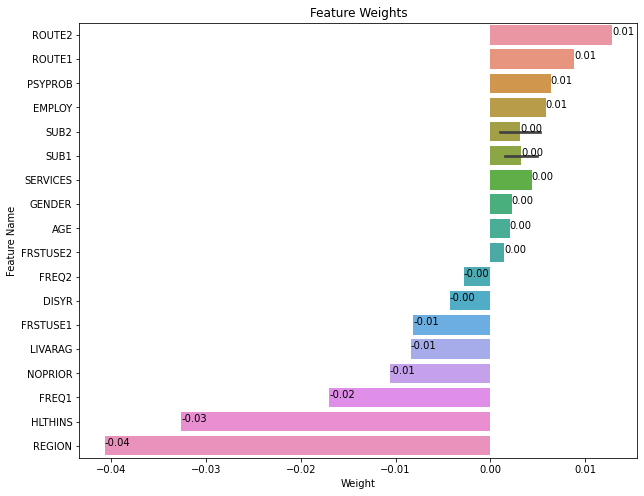

In [0]:
def show_values(axs, space=.01):
    """
    Plots weights based on their +/- correlations and strength
    :param axs: plot axis object of matplotlib
    :param space: (float) spacing parameter between 0 and 1
    """
    def _single(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.2f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


def plot_feature_weights(df):
    """
    Use variable weights from a regression model to plot visualization to understand key drivers of the model.
    :param df: pandas dataframe
    """
    plt.figure(figsize=(10, 8))
    p = sns.barplot(x=df['weight'], y=df['name'])
    show_values(p, space=0)

    plt.title('Feature Weights')
    plt.xlabel('Weight')
    plt.ylabel('Feature Name')

# Plot the weights representing positive and negative correlations, as well as their relative strength.
plot_feature_weights(weights)


##### 6.3 Business Recommendations <a id="business-recommendations"></a>


- <p>We see that patients who are homeless have lower Length of Stay, which might be because they can’t afford it. Since it is necessary to be treated after substance abuse, we recommend that cheaper facilities as well as  government funded facilities must be made available to ensure everyone has access to treatment.</p>

- <p>It is also clear that uninsured patients have a lower length of stay, this might also be because they cant afford it or can get admitted, thus the government should subsidize health insurance policies for people that cannot afford proper living arrangements</p>

- <p>We can see that people with co-occurring substance and mental disorders have longer Length of Stay, we recommend that therapy counselling sessions must be provided to them to help in the recovery process.</p>

- <p>We see that people below 18 years of age are also consuming alcohol and it has adverse effects on them. As  post underage drinking is done in private residences, there should be a neighborhood check on houses occupied primarily by teenagers by the HOA</p>

#### 7. References

1. <a id="ref1"></a> Dataset: https://www.datafiles.samhsa.gov/dataset/treatment-episode-data-set-admissions-2019-teds-2019-ds0001

2. <a id="ref2"></a> Codebook: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/TEDS-D-2019/TEDS-D-2019-datasets/TEDS-D-2019-DS0001/TEDS-D-2019-DS0001-info/TEDS-D-2019-DS0001-info-codebook_V1.pdf

3. <a id="ref3"></a> Battjes RJ, Gordon MS, O'Grady KE, Kinlock TW. Predicting retention of adolescents in substance abuse treatment. Addict Behav. 2004 Jul;29(5):1021-7. <a href="https://doi.org/10.1016/j.addbeh.2004.02.054">doi: 10.1016/j.addbeh.2004.02.054</a>. PMID: 15219352. 

4. <a id="ref4"></a> Editorial Staff. (2022, October 21). Alcohol and Drug Abuse Statistics (facts about addiction). American Addiction Centers. Retrieved November 3, 2022, from https://americanaddictioncenters.org/rehab-guide/addiction-statistics

5. <a id="ref5"></a> Gifford E, Foster EM. Provider-level effects on psychiatric inpatient length of stay for youth with mental health and substance abuse disorders. Med Care. 2008 Mar;46(3):240-6. <a href="https://doi.org/10.1016/j.addbeh.2004.02.054">doi:10.1097/MLR.0b013e318158aee7</a>. PMID: 18388838.

In [0]:
# Stop spark session
session.stop()